In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
def pro(x,y):
  return(np.dot(x,y))
def RMSE(y,y_pred):
  s = np.mean((y-y_pred)**2)
  return(np.sqrt(s))
def normalization(X2):
  X1 = []
  for x in X2.T[:]:
    x = (x - x.mean())/(np.std(x)+1)
    X1.append(x)
  X1 = np.array(X1)
  X1 = X1.T
  return X1

In [52]:
def split(Df):
  train = Df.to_numpy()
  x = train[:,1:4]
  m= np.shape(x)[0] 
  x = np.concatenate((np.ones((m,1)),x),axis =1)
  n = np.shape(x)[1]
  y = train[:,4] 
  y = y.reshape((m,1))
  xd = x
  
  for i in range(1,4):
    for j in range(i,4):
        s = ((xd[:,i])*(xd[:,j]))
        cube_term = (s*xd[:,j])
        s = s.reshape((m,1))
        cube_term = cube_term.reshape((m,1))
        poly = np.concatenate((s,cube_term),axis=1)
        x = np.concatenate((x,poly),axis=1)
  n = np.shape(x)[1]
  x = normalization(normalization(x))
  
  return x,y




In [53]:
def grad(x,y,alpha,no_iter):
  m,n = np.shape(x)
  theta = np.zeros((n,1))
  J_s,x_label =[],[]
  for i in range(no_iter):
    hyp = pro(x,theta)
    J = (1/(2*m))*(np.sum((hyp-y)**2))
    J_s.append(J)
    x_label.append(i+1)
    grad = (1/m)*pro(x.T,(hyp-y))
    theta -= alpha*grad
    if i%(no_iter/10)==0:
      print('cost after ',i,'iterations is',J)
  plt.plot(x_label,J_s)
  return theta


cost after  0 iterations is 727060.5592130942
cost after  1000 iterations is 126.27778442268325
cost after  2000 iterations is 125.17500702126704
cost after  3000 iterations is 125.10739786665063
cost after  4000 iterations is 125.10299329327417
cost after  5000 iterations is 125.10267129876976
cost after  6000 iterations is 125.10264306142669
cost after  7000 iterations is 125.10264002383879
cost after  8000 iterations is 125.10263964115914
cost after  9000 iterations is 125.10263958840603


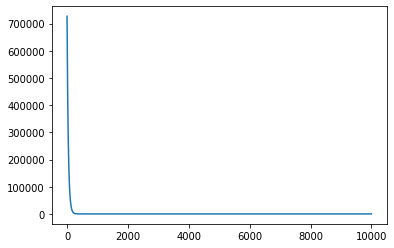

In [54]:
dftrain = pd.read_csv("Polynomial_train.csv")
x, y = split(dftrain)
theta = grad(x,y,0.05,10000)

In [55]:
dftest = pd.read_csv("Polynomial_test.csv")
xtest,ytest = split(dftest)
ypred = pro(xtest,theta)
dftest


,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325
...,...,...,...,...,...
9995,9995,-0.992449,-7.853677,7.748156,-635.006038
9996,9996,8.574451,6.271919,-5.734962,-1275.855209
9997,9997,6.640997,6.864877,4.511685,-1771.640694
9998,9998,-6.262414,1.323203,-3.917748,-22.746921


In [56]:
print(RMSE(ytest,ypred))
y_pred

23.207421424505696


array([[ -664.6555663 ],
       [ -572.30266168],
       [  -94.22451264],
       ...,
       [-1797.26175644],
       [  -40.24304565],
       [  -79.78540523]])